<h1>Pre-work</h1>

On my laptop I can't run the code for the entire dataframe, so it's going to be on the half and we'll have to run it at the library over more powerfull laptop. Unless one of us has a powerful enough laptop.
Other options:
- run on Google Cloud
- use Columbia's Cluster

In [128]:
import nltk
import numpy as np
import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import string
import spacy

from nltk import sent_tokenize,word_tokenize
from nltk.data import load
from nltk import FreqDist

from wordcloud import WordCloud, STOPWORDS

from datetime import datetime

from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

from sklearn.ensemble import ExtraTreesClassifier

from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel

from sklearn.pipeline import Pipeline
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import (RandomTreesEmbedding, RandomForestClassifier,
                              GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier)

from sklearn import metrics

from sklearn import model_selection
from sklearn.metrics import log_loss

from sklearn.metrics import fbeta_score, make_scorer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.calibration import CalibratedClassifierCV
start_time = datetime.now()


from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS


<h2>Processing functions</h2>

<h3>Normalization Function</h3>

<h4>Normalization over number of words

In [129]:
def normalization_word(var):
    words = nltk.Text(word_tokenize(((var))))
    return len(words)

<h4>Normalization by number of Sentences</h4>

In [130]:
def normalization_sentence(var):
    sentences = nltk.Text(sent_tokenize(var))
    return len(sentences)

<h4>Normalization by number of Characters</h4>


In [131]:
def normalization_character(var):
    return len(var)

<h3>Cleaning Function</h3>

In [132]:
def cleaning(var): #takes a string, returns a string with only lowercase letters an spaces
    plain_string = ""
    for x in var:
        x = x.lower()
        if (( 'a' <= x and x <= 'z') or x == ' '):
            plain_string += x
        elif x == '\'': #we replace the ' by a space 
            plain_string += ' '
    return plain_string 

<h3>Creation of the dataframes</h3>

In [133]:
train = pd.read_csv("train.csv") #the data is in the same folder
author_list = ['EAP', 'HPL', 'MWS']
train.text= train.text.astype(str) #casts the type of the text column to str. Useful?
train.author = pd.Categorical(train.author)

train = train[0:300]  #size reduction for coding

train_back_up = train.copy() #back up is used to define the future dataframes

In [134]:
#this cell is just for coding and testing the functions

test = train['text'][0]
#test2 = train['text'][39] #with "blabla"
#test3 = train['text'][70] #with 2 times "blabla"


<h1>Worldclouds</h1>

In [135]:
#these are the full text from the authors in array
eap = train[train.author=="EAP"]["text"].values
hpl = train[train.author=="HPL"]["text"].values
mws = train[train.author=="MWS"]["text"].values

#these are the full text from the authors in string containing all the lines of an author
eap_s = " ".join(eap)
hpl_s = " ".join(hpl)
mws_s = " ".join(mws)

#these are the full PLAIN (without capital and ponctuation) text from the authors in string containing all the lines of an author

eap_s_c = cleaning(eap_s)
hpl_s_c = cleaning(hpl_s)
mws_s_c = cleaning(mws_s)


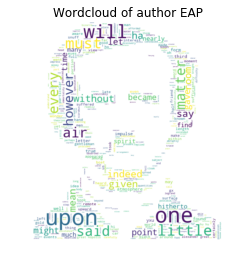

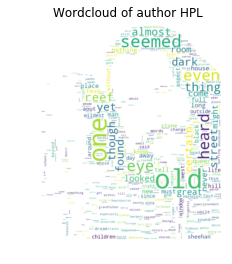

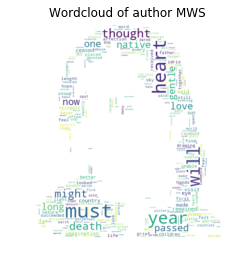

In [164]:
# Read the whole text.
list_text = [eap_s_c, hpl_s_c, mws_s_c]
# read the mask image
# taken from
# http://www.stencilry.org/
eap_mask = np.array(Image.open("eap_mask.jpg"))
hpl_mask = np.array(Image.open("hpl_mask.jpg"))
mws_mask = np.array(Image.open("mws_mask.jpg"))

list_mask = [eap_mask, hpl_mask, mws_mask]

stopwords = set(STOPWORDS)

for i in range(3):

    wc = WordCloud(background_color="white", max_words=2000, mask=list_mask[i],
                   stopwords=stopwords)
    # generate word cloud
    wc.generate(list_text[i])
    
    # show
    plt.imshow(wc, interpolation='bilinear')

    plt.title('Wordcloud of author ' + author_list[i])
    plt.axis("off")
    plt.figure()
    # store to file
    wc.to_file("{}_wordcloud.png".format(author_list[i]))


plt.show()

<h1>Splitting the training set.</h1>
<br>
Because we have only two dataset, one for training and the other for the Kaggle test. We need to split our 'Kaggle training' set (called t0) into training (called tr1) (in the sense of the training of our predictive model) and testing set (called ts1) ( in the sense of testing our models, and not be tested by Kaggle ! ). <br>
<br>
We shall notice we will choose the best classifier only with the TR1 DataSet. Then, we will test this classifier with TS1 to see if we over-fitted over TR1.<br>
<br>

Once we chose the classifier, checked the over-fitting, we will be able to train a the chosen classifier over TR1 and TS1. And so, we'll be able to predict over the "Kaggle Test Dataset" and submit the file. 

In [138]:
t0 = train.copy()

In [140]:
split_coef = 20/80 #80% for tr1, 20% for ts1   Maybe we'll have to change

tr1, ts1 = train_test_split(t0, test_size = split_coef)

#we must study further, it's possible to choose parameters... (TBD)

print( len(t0))
print(len(tr1))
print(len(ts1))
print(len(tr1)/len(t0))
print(len(ts1)/len(t0))
print(len(tr1)/len(t0) + len(ts1)/len(t0))

#tr1.head()

300
225
75
0.75
0.25
1.0


<h1>Feature Engineering</h1>

<h2>Meta-Data</h2>

<h3>Average sentence length (in characters)</h3>

In [141]:
def length_character(var):#takes string, return int
    return len(var)/normalization_sentence(var)

<h3>Average sentence length (in words)</h3>

In [142]:
def length_sentence(var):#takes string, return int
    return len(var.split())/normalization_sentence(var)

<h3>Average characters per word</h3>

In [143]:
def length_word(var):#takes string, return int
    return len(var.split())/normalization_word(var) #only word and not punctuations

<h3>Punctuation density</h3>
Maybe we forgot some punctuation. We should check that

In [144]:
def density_coma(var):#take a string, a punc, return a ratio
    cpunc = 0
    for x in var:
        if x == ',':
            cpunc +=1
    return cpunc/normalization_character(var)

In [145]:
def density_point(var):#take a string, a punc, return a ratio
    cpunc = 0
    for x in var:
        if x == '.':
            cpunc +=1
    return cpunc/normalization_character(var)

In [146]:
def density_colon(var):#take a string, a punc, return a ratio
    cpunc = 0
    for x in var:
        if x == ':':
            cpunc +=1
    return cpunc/normalization_character(var)

In [147]:
def density_semicolon(var):#take a string, a punc, return a ratio
    cpunc = 0
    for x in var:
        if x == ';':
            cpunc +=1
    return cpunc/normalization_character(var)

In [148]:
def density_interro(var):#take a string, a punc, return a ratio
    cpunc = 0
    for x in var:
        if x == '?':
            cpunc +=1
    return cpunc/normalization_character(var)

In [149]:
def density_expl(var):#take a string, a punc, return a ratio
    cpunc = 0
    for x in var:
        if x == '!':
            cpunc +=1
    return cpunc/normalization_character(var)

<h3>Percentage of unique words per sentence</h3>

In [150]:
def vocabulary_sentence(var):#take string, return a float: the ratio of different words over the total of words
    var = nltk.Text(sent_tokenize(var))
    vocabulary_list = []
    for c in var:
        if normalization_word(c)!= 0:
            vacabulary_count_sentence = len({x.lower() for x in word_tokenize(cleaning(c))})
            vocabulary_list.append(vacabulary_count_sentence/normalization_word(c))
    return np.mean(vocabulary_list)

In [152]:
#vocabulary_sentence("Wow, this is a bad one. On Macs running the latest version of High Sierra (10.13.1 (17B48)), it appears that anyone can log in just by putting “root” in the user name field in a certain place. This is a huge, huge problem. Apple will fix it probably within hours but holy moly. Do not leave your Mac unattended")

<h3>Stopword percentage</h3>

In [153]:
def density_stopword(var):#take a string, return a float: the ratio of stopwords (useless words)
    cs = 0
    for x in nltk.Text(word_tokenize(var)):
        if x in STOPWORDS:
            cs +=1
    return cs/normalization_word(var)

<h3>Noun Density</h3>

In [154]:
def density_noun(var): #take a string return the ratio of nouns
    l = []
    for x in nltk.pos_tag(word_tokenize(var)):
        if x[1][0:2]=='NN': #all the noun tags start with NN
            l.append(x)
    return len(l)/normalization_word(var)

<h3>Verb Density</h3>

In [155]:
def density_verb(var): #take a string return the ratio of verbs
    l = []
    for x in nltk.pos_tag(word_tokenize(var)):
        if x[1][0:2]=='VB': #all the noun tags start with NN
            l.append(x)
    return len(l)/normalization_word(var)

<h3>Adjective Density</h3>

In [156]:
def density_adjective(var): #take a string return the ratio of adjectivs
    l = []
    for x in nltk.pos_tag(word_tokenize(var)):
        if x[1][0:2]=='JJ': #all the noun tags start with NN
            l.append(x)
    return len(l)/normalization_word(var)

<h3>Adjective to noun ratio</h3>

In [157]:
 def adjective_to_noun(var): #return the ratio of nouns to adjectives
    return (density_adjective(var))/(density_noun(var)+ 0.5) #because of division by 0

<h3>Building of the Dataframe of Metadata</h3>

In [158]:
#this is the list of all the meta data we are going to use to train our classifiers
#We are also going to use bags of words

#could be modified if we add meta_data
list_meta = [length_character,
             length_sentence,
             length_word,  
             vocabulary_sentence,
             density_stopword,
             density_noun,
             density_verb,
             density_adjective,
             adjective_to_noun,
             density_coma,
             density_point,
             density_colon,
             density_semicolon,
             density_interro,
             density_expl
            ]

In [204]:
#here we build a dataframe with for each sentence, the author and each of the meta-data related to the sentence

def build_meta(dataframe):
    df_meta = dataframe.copy()
    
    for f in list_meta:
        df_meta[f.__name__] = df_meta.text.apply(f)
        
    return df_meta


        

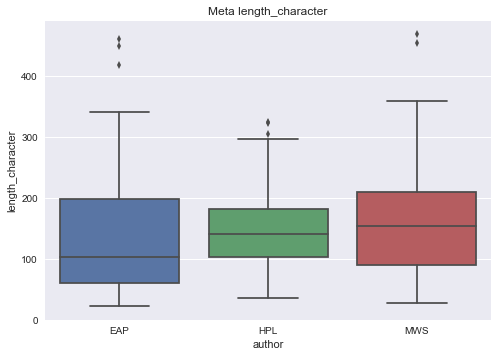

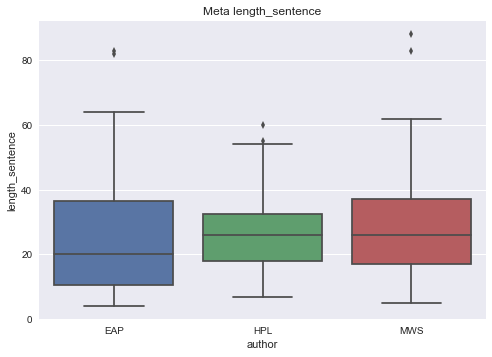

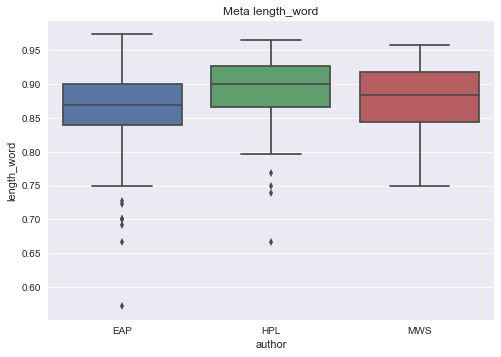

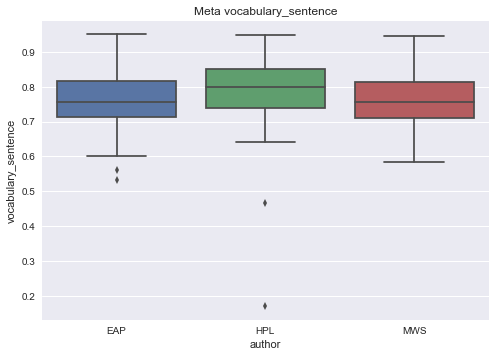

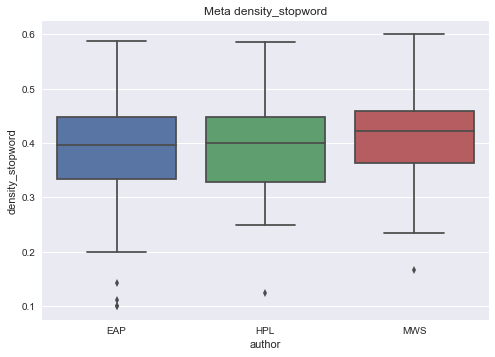

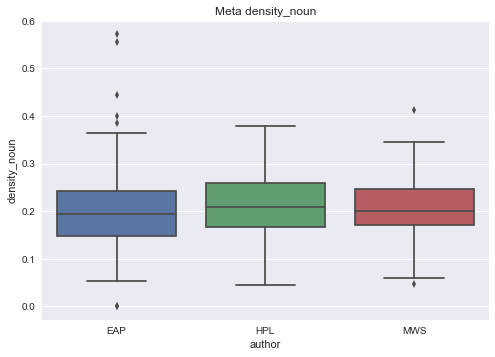

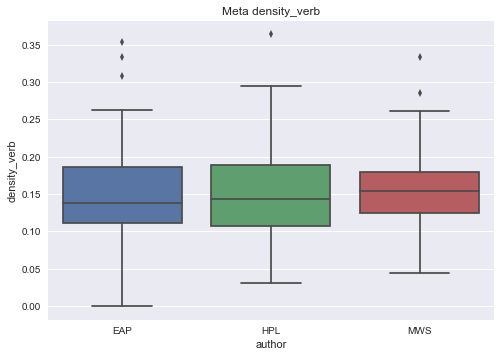

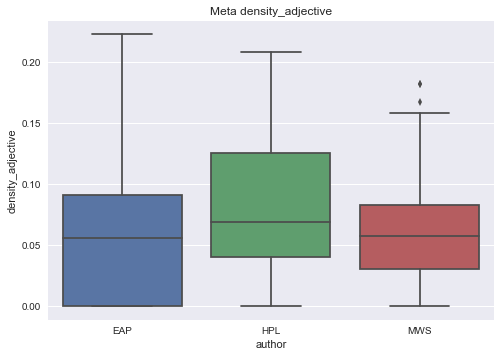

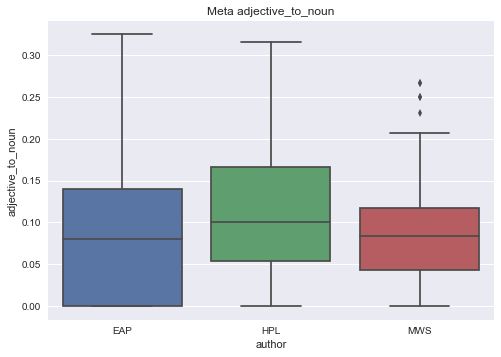

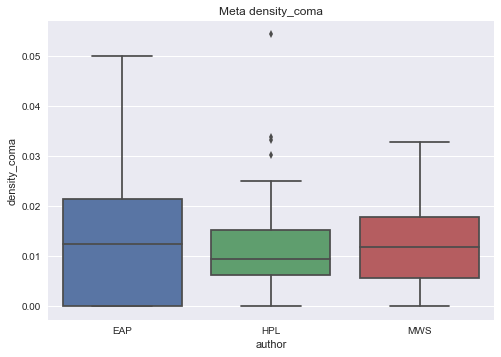

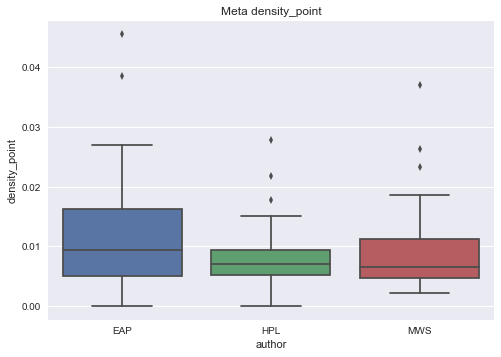

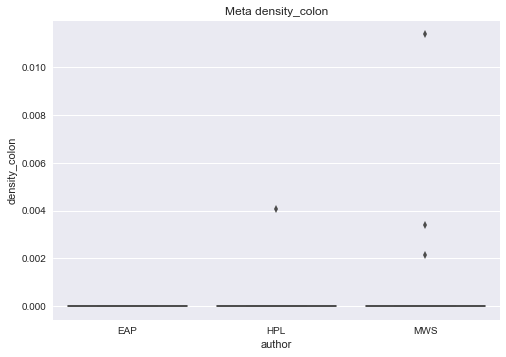

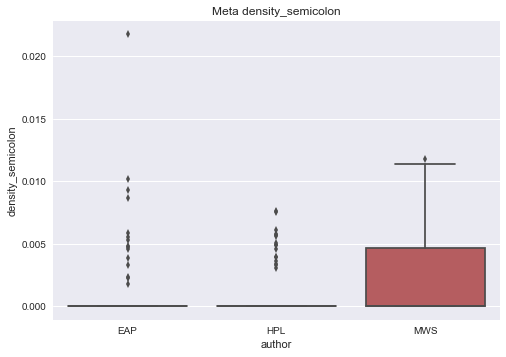

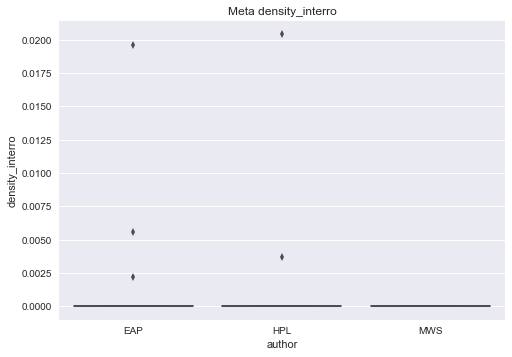

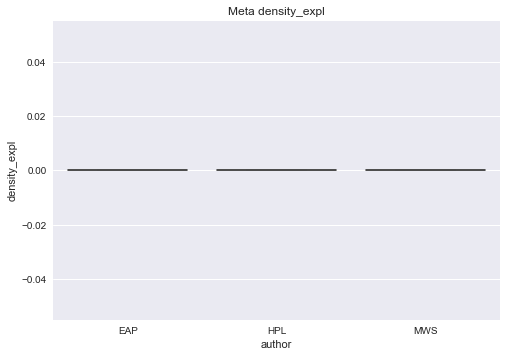

In [208]:
datameta = build_meta(tr1)

for c in datameta.columns[3:]:
    plt.style.use('seaborn')
    sns.boxplot(x = 'author', y = c, data = datameta)
    plt.title('Meta {}'.format(c))
    plt.savefig(name)
    plt.show()

<h1> First word </h1>

In [ ]:
def first_word_type(sents):
    res=list()
    for sent in sents:
        typ=nltk.pos_tag(sent.split())
        i=0
        j=0
        word=typ[i][0].lower()
        while i<len(sent.split()):
            if j<len(word) and word[j] >= 'a' and word[j] <= 'z':
                res.append(typ[i][1])
                break
            i=i+1
        
    return res

Function that takes a dataframe as input to create the columns for the type of first word of the sentences and set the values 

In [ ]:
def first_word(dataframe):
    df=dataframe.copy()
    for i in range(len(df)):
        sents=nltk.Text(sent_tokenize(df['text'].iloc[i]))
        first_words=first_word_type(sents)
        for word in first_words:
            column='first_word_' + str(word)
            try:
                df[column].iloc[i]=df[column].iloc[i]+1
            except:
                df[column]=0
                df[column].iloc[i]=1
            
    return df
            

In [ ]:
first_word(tr1)

<h1> Two first Words </h1>

In [ ]:
def twofirst_words_type(sents):
    res = list()
    for sent in sents:
        if len(sent.split()) > 1:
            typ=nltk.pos_tag(sent.split())
            res.append([typ[0][1],typ[1][1]])
    return res

In [ ]:
def twofirst_word(dataframe):
    df=dataframe.copy()
    for i in range(len(df)):
        sents=nltk.Text(sent_tokenize(df['text'].iloc[i]))
        twofirst_words = twofirst_words_type(sents)
        for twoword in twofirst_words:
            column='first_two_' + str(twoword)
            try:
                df[column].iloc[i]=df[column].iloc[i]+1
            except:
                df[column]=0
                df[column].iloc[i]=1
    return df

In [ ]:
twofirst_word(tr1)

<h1> Last word </h2>

In [ ]:
def last_word_type(sents):
    res=list()
    for sent in sents:
        typ=nltk.pos_tag(sent.split())
        i=0
        j=0
        word=typ[-i][0].lower()
        while i<len(sent.split()):
            if j<len(word) and word[j] >= 'a' and word[j] <= 'z':
                res.append(typ[-i][1])
                break
            i=i+1
        
    return res

In [ ]:
def last_word(dataframe):
    df=dataframe.copy()
    for i in range(len(df)):
        sents=nltk.Text(sent_tokenize(df['text'].iloc[i]))
        last_words=last_word_type(sents)
        for word in last_words:
            column='last_word_' + str(word)
            try:
                df[column].iloc[i]=df[column].iloc[i]+1
            except:
                df[column]=0
                df[column].iloc[i]=1
    return df

In [ ]:
last_word(tr1)

<h1> Two last words </h1>

In [ ]:
def twolast_words_type(sents):
    res = list()
    for sent in sents:
        if len(sent.split()) > 1:
            typ=nltk.pos_tag(sent.split())
            res.append([typ[-2][1],typ[-1][1]])
    return res

In [ ]:
def twolast_word(dataframe):
    df=dataframe.copy()
    for i in range(len(df)):
        sents=nltk.Text(sent_tokenize(df['text'].iloc[i]))
        twolast_words = twolast_words_type(sents)
        for twoword in twolast_words:
            column='last_two_' + str(twoword)
            try:
                df[column].iloc[i]=df[column].iloc[i]+1
            except:
                df[column]=0
                df[column].iloc[i]=1
    return df

In [ ]:
twolast_word(tr1)

<h1> Foreign Language </h1>

Each foreign language is a new feature. Each sentence is assigned to a language, the coefficient under a category is the ratio of sentences in the extract written in this language

In [ ]:
!pip install langdetect
from langdetect import detect

In [ ]:
#for a list of sentences, returns a list of the language for each sentence whose language can be detected
def language_sent(sents):
    res=list()
    for sent in sents:
        try:
            res.append(detect(sent))
        except:
            pass
            
    return res

In [ ]:
def language(dataframe):
    df=dataframe.copy()
    for i in range(len(df)):
        sents=nltk.Text(sent_tokenize(df['text'].iloc[i]))
        n=len(sents)
        languages=language_sent(sents)
        for language in languages:
            if language != 'en':
                column=language
                try:
                    df[column].iloc[i]=df[column].iloc[i]+1/n
                except:
                    df[column]=0
                    df[column].iloc[i]=1/n
                    
    return df
            

In [ ]:
language(tr1)

## Names identification

We use Named Entity Recognition (NER) to parse sentences to find entities. The idea is that if we identify names of persons, places, companies (and other entities), they can be recurrent in sentences from the same author because they are recurrent within a book

In [160]:
"""
nlp = spacy.load('en')
def transform_ner(var):
    doc = nlp(var)
    l = set([(ent.text) for ent in doc.ents])
    return l
transform_ner('Philippe is looking at buying U.K. startup for $1 billion')

"""

"\nnlp = spacy.load('en')\ndef transform_ner(var):\n    doc = nlp(var)\n    l = set([(ent.text) for ent in doc.ents])\n    return l\ntransform_ner('Philippe is looking at buying U.K. startup for $1 billion')\n\n"

In [161]:
"""
def build_metric(df)
    
    df_metric = df.copy()
    #tu fais la copie de ton dataframe pour bosser sur un nouvel objet 
    #1 tu crees la liste de tous les mots/tag/lieux que tu veux comptabliser
    set_of_entities_name = {}
    for sent in df_metric['text']:
        set_of_entities_name.add(transform_ner(sent))
    
    #2 tu crees une fonction qui prend en argument 
    #(la phrase du df que tu veux etudier, le mot de ta liste que tu veux comptabiliser)

    #je te laisse adapter a ton cas, ici c'etait pour le compte de ponctuation 
    #(donc j'etudie caracter par caracter, toi je pense que tu devras utiliser les word token)

    #ta fonction retounera la valeur numeric que tu veux

    
    def density_punctuation(var, punc):#take a string, a punc, return a ratio
        #a adapter 
        
        cpunc = 0
        for x in var:
            if x == punc:
                cpunc +=1
        return cpunc/normalization_character(var)

    #3 use of vectorization function 
    #ici tu vas remplir ton dataframe avec n column correspondant au n elements de ton datafram

    for c in list_punctuation:
        df_metric[c] = np.vectorize(density_punctuation)(df_metric.text, c)
        
    return df_metric
    
"""

"\ndef build_metric(df)\n    \n    df_metric = df.copy()\n    #tu fais la copie de ton dataframe pour bosser sur un nouvel objet \n    #1 tu crees la liste de tous les mots/tag/lieux que tu veux comptabliser\n    set_of_entities_name = {}\n    for sent in df_metric['text']:\n        set_of_entities_name.add(transform_ner(sent))\n    \n    #2 tu crees une fonction qui prend en argument \n    #(la phrase du df que tu veux etudier, le mot de ta liste que tu veux comptabiliser)\n\n    #je te laisse adapter a ton cas, ici c'etait pour le compte de ponctuation \n    #(donc j'etudie caracter par caracter, toi je pense que tu devras utiliser les word token)\n\n    #ta fonction retounera la valeur numeric que tu veux\n\n    \n    def density_punctuation(var, punc):#take a string, a punc, return a ratio\n        #a adapter \n        \n        cpunc = 0\n        for x in var:\n            if x == punc:\n                cpunc +=1\n        return cpunc/normalization_character(var)\n\n    #3 use of 

<h2>Counting of words (a.k.a bag of words)</h2>

Instead of word/ n-grams frequencies, we are going to use tf_idf

Some words about tf_idf: https://buhrmann.github.io/tfidf-analysis.html

Here, we don't detail for each N. I mean we'll run the tf_idf for all the n-grams possible and the we'll take the best features. Our aim is to reduce the size of our dataset (it will be explained further why we should reduce the size. 

<h3>Function to transform a string to a string of Pos_tag</h3>

In [162]:
def transform_tag(var):
    inpt = nltk.pos_tag(word_tokenize(var))
    unzipped = zip(*inpt )
    return ' '.join([*list(unzipped)[1]])

<h3>Generation of the tf_idf counting dataFrame</h3>

In [31]:
#this function works for n-grams of characters, pos tokens or words

#first argument is the n in n-gram
#analysis type is 'word', 'char', token_pos', ...

def counting_a(a, analysis):
    
    df_train = tr1.copy()
    df_test  = ts1.copy()
    
    #if we are counting words:
    if analysis == "word" or analysis == "char": 
        
        #check the CountVectorizer doc
        #we create a Countvectorizer, called bow_transformer
        bow_transformer = CountVectorizer(analyzer = analysis,
                                      lowercase = True, #we don't care about place in sentence
                                      ngram_range = (a, a),
                                      stop_words='english')

        #we use bow_transformer to fit and transform our training set
        messages_bow = bow_transformer.fit_transform(df_train['text'])
        
        #we use bow_transformer to transform our test set. 
        #We do not need to train if first because the fitting would recompute the idf, we don't want that
        messages_bow_test = bow_transformer.transform(df_test['text'])
    
    #if we are counting POS:    
    elif analysis == "token_pos":
        
        #this is the punctuation we want to keep
        punctuation = r"(?u)\b\w\w+\b|!|\?|\"|\'|\.|\,|\;|\:|\$|\(|\)|\--|\&|\``|\'' + PRP$ + WP$"
        #we create a Countvectorizer, called bow_transformer
        bow_transformer = CountVectorizer(analyzer = 'word',
                                          lowercase = False, #we DO care about place in sentence
                                          ngram_range = (a, a),
                                          token_pattern =  punctuation, #we DO care about punctuation
                                          stop_words='english')
        
        #we use the transform_tag function to transform the sentence in a sentence of pos tag        
        #we use bow_transformer to fit and transform our training set
        messages_bow = bow_transformer.fit_transform(df_train['text'].apply(transform_tag))
        #we use bow_transformer to transform our test set
        #We do not need to train if first because the fitting would recompute the idf, we don't want that
        messages_bow_test = bow_transformer.transform(df_test['text'].apply(transform_tag))

        
    #this is the DataFrame Concerning the regular counting of words
    
    ##from regular counting to tf idf transformation coefficient

    tfidf_transformer = TfidfTransformer().fit(messages_bow)
    messages_tfidf = tfidf_transformer.transform(messages_bow)
    messages_tfidf_test = tfidf_transformer.transform(messages_bow_test)
    
    names = bow_transformer.get_feature_names()
     
    
    
    
    return (messages_tfidf, names, messages_tfidf_test)


In [165]:
#mat_word, name_word, mat_word_test = counting_a(2,'word')
mat_word, name_word, mat_word_test = counting_a(2,'word')

print ('Shape of Sparse Matrix: ', mat_word.shape)
print ('Amount of Non-Zero occurences: ', mat_word.nnz)
print ('sparsity: %.2f%%' % (100.0 * mat_word.nnz /
                             (mat_word.shape[0] * mat_word.shape[1])))
       
print(' ')
print ('Shape of Sparse Matrix Test: ', mat_word_test.shape)
print ('Amount of Non-Zero occurences: ', mat_word_test.nnz)
print ('sparsity: %.2f%%' % (100.0 * mat_word_test.nnz /
                             (mat_word_test.shape[0] * mat_word_test.shape[1])))
                             

Shape of Sparse Matrix:  (225, 2449)
Amount of Non-Zero occurences:  2451
sparsity: 0.44%
 
Shape of Sparse Matrix Test:  (75, 2449)
Amount of Non-Zero occurences:  7
sparsity: 0.00%


As we can see, we get a matrix with <u>roughly a thousand </u>of  features. It's really heavy and we get a sparse matrix. Our goal is now to reduce the size of this matrix by getting the TOP-N features issued from the tf_idf.<br>
<br>
And we can create so both the matrix of training set. On which the TF_IDF is trained. <br>
And the matrix test, which is created with no-fit on it.

<h3>Reduction of the number of features to N</h3>

The next cell will be called in all the bag of words part.

In [166]:
#Gets top n tf_idf values in row and return them with their corresponding feature names.
def top_tfidf_feats(row, features, top_n=25):
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats)
    df.columns = ['feature', 'tfidf']
    return df

In [167]:
#Top tfidf features in specific document (matrix row)
def top_feats_in_doc(Xtr, features, row_id, top_n=25):
    row = np.squeeze(Xtr[row_id].toarray())
    return top_tfidf_feats(row, features, top_n)

In [168]:
#Return the top n features that on average are most important amongst documents in rows
    #indentified by indices in grp_ids. '''
def top_mean_feats(Xtr, features, grp_ids=None, min_tfidf=0.1, top_n=25):
    if grp_ids:
        D = Xtr[grp_ids].toarray()
    else:
        D = Xtr.toarray()

    D[D < min_tfidf] = 0
    tfidf_means = np.mean(D, axis=0)
    return top_tfidf_feats(tfidf_means, features, top_n)

In [169]:
def top_feats_by_class(Xtr, y, features, min_tfidf=0.1, top_n=25):
    #Return a list of dfs, where each df holds top_n features and their mean tfidf value
    #calculated across documents with the same class label. '''
    dfs = []
    labels = np.unique(y)
    for label in labels:
        ids = np.where(y==label)
        feats_df = top_mean_feats(Xtr, features, ids, min_tfidf=min_tfidf, top_n=top_n)
        feats_df.label = label
        dfs.append(feats_df)
    return dfs

In [182]:
def plot_tfidf_classfeats_h(dfs, name = 'default'):
    #Plot the data frames returned by the function plot_tfidf_classfeats(). '''
    fig = plt.figure(figsize=(12, 9), facecolor="w")
    x = np.arange(len(dfs[0]))
    for i, df in enumerate(dfs):
        ax = fig.add_subplot(1, len(dfs), i+1)
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.set_frame_on(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()
        ax.set_xlabel("Mean Tf-Idf Score", labelpad=16, fontsize=14)
        ax.set_title("label = " + str(df.label), fontsize=16)
        ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
        ax.barh(x, df.tfidf, align='center', color='#3F5D7D')
        ax.set_yticks(x)
        ax.set_ylim([-1, x[-1]+1])
        yticks = ax.set_yticklabels(df.feature)
        plt.subplots_adjust(bottom=0.09, right=0.97, left=0.15, top=0.95, wspace=0.52)
    #this line is for saving as picture
    plt.savefig(name)
    #this line is for showing
    plt.show()

<h3>Dimensionnality reduction for bag of words (example for 2-grams)</h3>
We reduce by taking the TOP-N per author

In [183]:
alpha_word = top_feats_by_class(mat_word, tr1.author, name_word)

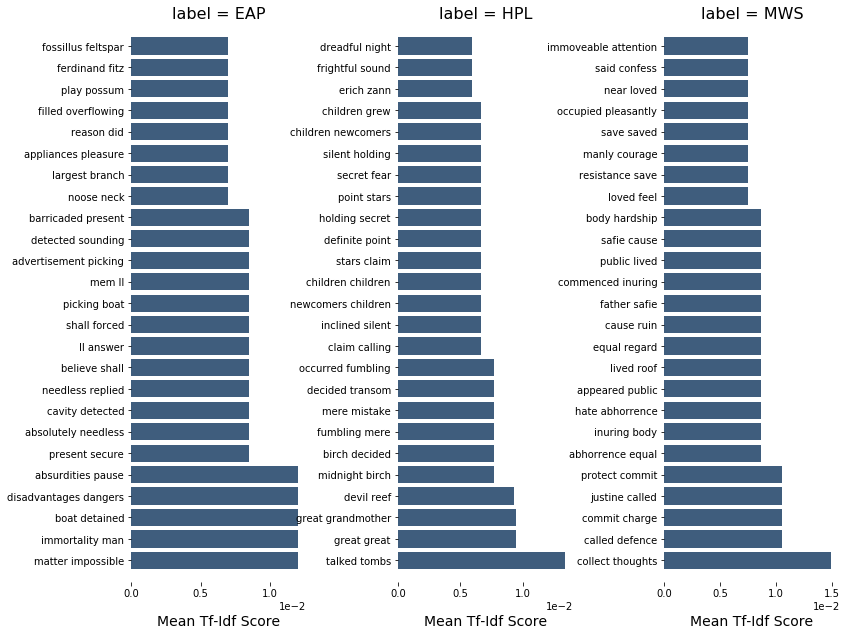

In [184]:
plot_tfidf_classfeats_h(alpha_word, 'bi_gram_word')


<h3>Building of bag of word and feature vectors</h3>

In [185]:
#counting_a(1,'word')

In [186]:
def build_bag_a(a,  analysis, top_n = 50):
    df_bag = tr1.copy()
    df_bag_test = ts1.copy()
    
    build = counting_a(a, analysis)
    
    alpha = top_feats_by_class(build[0], df_bag.author, build[1], top_n = top_n)

    a = list(alpha[0].feature.values)
    b = list(alpha[1].feature.values)
    c = list(alpha[2].feature.values)
    bag = set(a + b + c)


    for w in bag:
        vec = build[0][:, build[1].index(w)].toarray()
        df_bag[w] = vec

        vec_test = build[2][:, build[1].index(w)].toarray()
        df_bag_test[w] = vec_test
        
    df_bag = df_bag.drop(labels = ['text','author'], axis = 1)
    df_bag_test = df_bag_test.drop(labels = ['text','author'], axis = 1)

        
    return df_bag, df_bag_test

In [187]:
#build_bag_a(4, 'token_pos')[0].shape

In [188]:
#build_bag_a(2, 'word')[0].head()

In [189]:
#build_bag_a(2, 'token_pos')[0]

In [190]:
#print(set(list(build_bag_a(2, 'word')[1]))-set(list(build_bag_a(2, 'word')[0])))


So, we get the top N-gramms of words. Our problem is the depedency on the topic. We need to produce other features which are less dependant on the topic. There are sereveral possibility. Let's detail: <br>
- Stemming<br>
- Character Counting<br>
- Pos_tagging

<h2>Counting of Stem (TBD) (a.k.a bag of character)</h2>


<h2>Counting of Character (a.k.a bag of character)</h2>

Here, we count the use of some caracter, and n-grams of caracter.

<h3>Generation of the tf_idf counting dataFrame</h3>

In [192]:

mat_char, name_char, mat_char_test = counting_a(3, 'char')

print ('Shape of Sparse Matrix: ', mat_char.shape)
print ('Amount of Non-Zero occurences: ', mat_char.nnz)
print ('sparsity: %.2f%%' % (100.0 * mat_char.nnz /
                             (mat_char.shape[0] * mat_char.shape[1])))
print(' ')
print ('Shape of Sparse Matrix Test: ', mat_char_test.shape)
print ('Amount of Non-Zero occurences: ', mat_char_test.nnz)
print ('sparsity: %.2f%%' % (100.0 * mat_char_test.nnz /
                             (mat_char_test.shape[0] * mat_char_test.shape[1])))
                             

Shape of Sparse Matrix:  (225, 3492)
Amount of Non-Zero occurences:  28828
sparsity: 3.67%
 
Shape of Sparse Matrix Test:  (75, 3492)
Amount of Non-Zero occurences:  9748
sparsity: 3.72%


<h3>Dimensionnality reduction for bag of characters example for 3 gram</h3>
We reduce by taking the TOP-N per author

In [47]:
alpha_char = top_feats_by_class( mat_char, tr1.author, name_char)

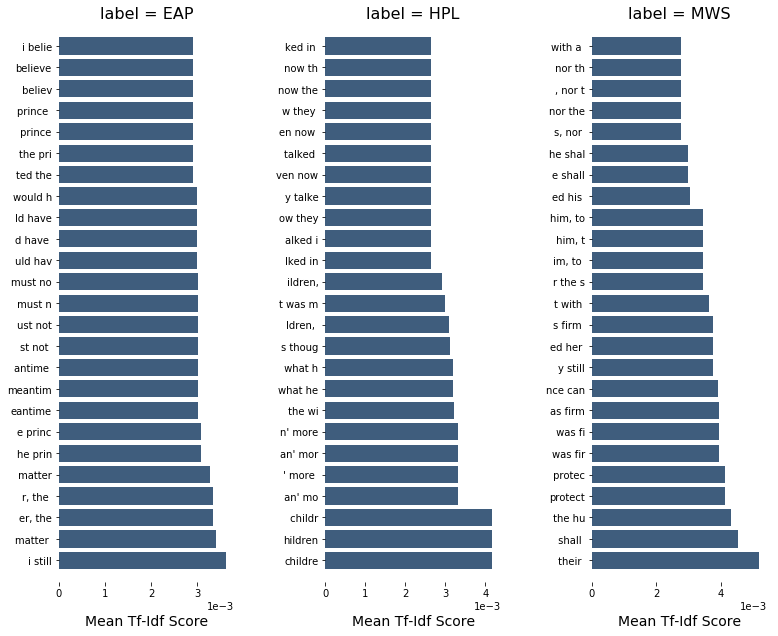

In [193]:
plot_tfidf_classfeats_h(alpha_char, 'tr_gram_char')

<h3>Building of bag of character and feature vectors</h3>

In [194]:
#build_bag_a(3, 'char')[0].shape


<h2>Counting of POS Tag (a.k.a bag of Tag)</h2>

Here, we count the use of some caracter, and n-grams of caracter.<br>
So we have, some non-topic sensitive features.<br>
But we can produce an other type of feature based on the POS_tagging.

POS tag features. 

We will check the occurence of the elements from the Upenn Tagset. <br>

In [195]:
tagdict = load('help/tagsets/upenn_tagset.pickle')
#list of all the possible tag names
print("|\\".join(list(tagdict)))

#this is the list of the different tokens we will use.
len(tagdict)

LS|\TO|\VBN|\''|\WP|\UH|\VBG|\JJ|\VBZ|\--|\VBP|\NN|\DT|\PRP|\:|\WP$|\NNPS|\PRP$|\WDT|\(|\)|\.|\,|\``|\$|\RB|\RBR|\RBS|\VBD|\IN|\FW|\RP|\JJR|\JJS|\PDT|\MD|\VB|\WRB|\NNP|\EX|\NNS|\SYM|\CC|\CD|\POS


45

<h3>Generation of the tf_idf counting dataFrame</h3>
We had to adapt the arguments passed in the CountVectorizer.

In [196]:

mat_pos, name_pos, mat_pos_test = counting_a(4, 'token_pos')

print ('Shape of Sparse Matrix: ', mat_pos.shape)
print ('Amount of Non-Zero occurences: ', mat_pos.nnz)
print ('sparsity: %.2f%%' % (100.0 * mat_pos.nnz /
                             (mat_pos.shape[0] * mat_pos.shape[1])))

print ('Shape of Sparse Test Matrix: ', mat_pos_test.shape)
print ('Amount of Non-Zero occurences: ', mat_pos_test.nnz)
print ('sparsity: %.2f%%' % (100.0 * mat_pos_test.nnz /
                             (mat_pos_test.shape[0] * mat_pos_test.shape[1])))
                             


Shape of Sparse Matrix:  (225, 3932)
Amount of Non-Zero occurences:  6482
sparsity: 0.73%
Shape of Sparse Test Matrix:  (75, 3932)
Amount of Non-Zero occurences:  1243
sparsity: 0.42%


<h3>Dimensionnality reduction for bag of tags Example for 2 grams</h3>
We reduce by taking the TOP-N per author

In [197]:
alpha_pos = top_feats_by_class(mat_pos, tr1.author, name_pos, top_n = 10)

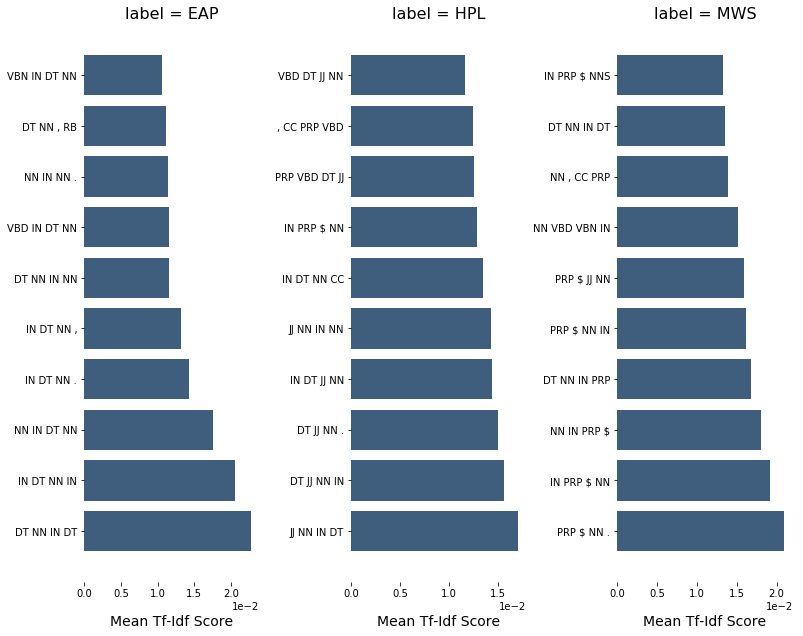

In [199]:
plot_tfidf_classfeats_h(alpha_pos, "four_gram_tag_pos")

<h3>Building of bag of tag and feature vectors</h3>

In [200]:
#build_bag_a(2,'token_pos')[0].head()


<h2>Positivness/negativness</h2>

<h4>Weighted sentiment analysis using Vader</h4>
Vader contains a list of 7500 features weighted by how positive or negative they are</h4>
<br>It uses these features to calculate stats on how positive, negative and neutral a passage is<br>
<br>And combines these results to give a compound sentiment (higher = more positive) for the passage<br>
<br>Human trained on twitter data and generally considered good for informal communication<br>
<br>10 humans rated each feature in each tweet in context from -4 to +4</h4>
<br>Calculates the sentiment in a sentence using word order analysis</h4>
<br>"marginally good" will get a lower positive score than "extremely good"
<br>Computes a "compound" score based on heuristics (between -1 and +1)</h4>
<br>Includes sentiment of emoticons, punctuation, and other 'social media' lexicon elements<br>


In [201]:
def vader_comparison(texts):
    from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
    headers = ['pos','neg','neu','compound']
    analyzer = SentimentIntensityAnalyzer()
    sentences = sent_tokenize(texts)
    pos=compound=neu=neg=0
    num_sentences = len(sentences)
    for sentence in sentences:
        vs = analyzer.polarity_scores(sentence)
        pos+=vs['pos']/num_sentences
        compound+=vs['compound']/num_sentences
        neu+=vs['neu']/num_sentences
        neg+=vs['neg']/num_sentences
    return pos, neg, neu, compound

def density_positive(var):
    return vader_comparison(var)[0]

def density_negative(var):
    return vader_comparison(var)[1]

def density_neutral(var):
    return vader_comparison(var)[2]

def density_compound(var):
    return vader_comparison(var)[3]

In [209]:
def build_sensi(dataframe):
    df_sen = dataframe.copy() #change here to make sense

    df_sen[density_positive.__name__] = df_sen.text.apply(density_positive)
    df_sen[density_negative.__name__] = df_sen.text.apply(density_negative)
    df_sen[density_neutral.__name__] = df_sen.text.apply(density_neutral)
    df_sen[density_compound.__name__] = df_sen.text.apply(density_compound)
    


    return df_sen

#build_sensi(ts1).shape

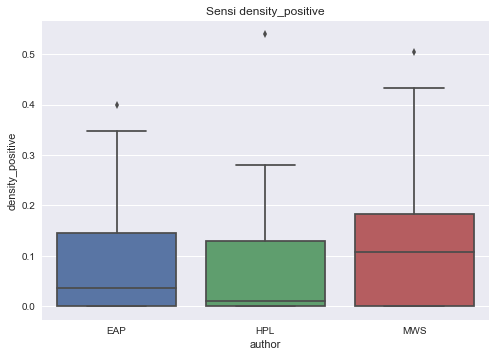

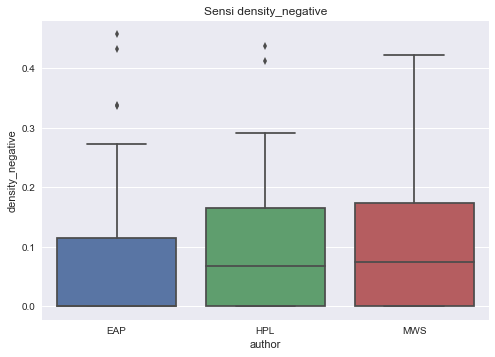

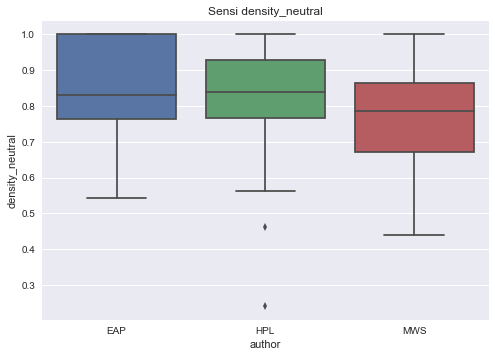

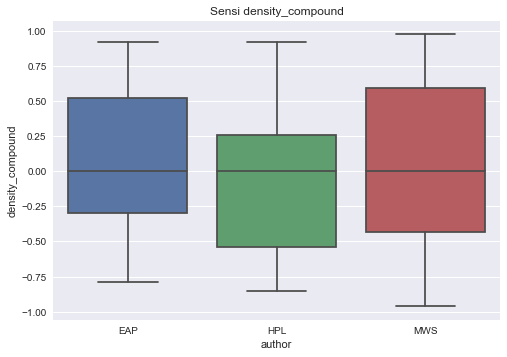

In [210]:
datameta = build_sensi(tr1)

for c in datameta.columns[3:]:
    plt.style.use('seaborn')
    sns.boxplot(x = 'author', y = c, data = datameta)
    plt.title('Sensi {}'.format(c))
    plt.savefig(name)
    plt.show()

We have all the differents features to add but I'd like to focus on the predections...

<h2>Fusion of the bunch of features.</h2>

In [101]:
#we build here the 2 feature datasets (one for TR1, one for TS1)
#should be adapted when we'll add features

def build_bunch_tr1(dataframe):
    list_df_tr = [build_meta(dataframe),
                  build_sensi(dataframe),
                  build_bag_a(1,'word')[0],
                  build_bag_a(2,'word')[0],
                  build_bag_a(3,'word')[0],
                  build_bag_a(1,'char')[0],
                  build_bag_a(2,'char')[0],
                  build_bag_a(3,'char')[0],
                  build_bag_a(4,'char')[0],
                  build_bag_a(5,'char')[0],
                  build_bag_a(6,'char')[0],
                  build_bag_a(7,'char')[0],
                  build_bag_a(1, 'token_pos')[0],
                  build_bag_a(2, 'token_pos')[0],
                  build_bag_a(3, 'token_pos')[0],
                  build_bag_a(4, 'token_pos')[0],
                  build_bag_a(5, 'token_pos')[0],
                  build_bag_a(6, 'token_pos')[0]
              ]
    bunch = pd.merge(list_df_tr[0], list_df_tr[1])
    
    for i in range(2, len(list_df_tr)):
        alpha = bunch
        bunch = pd.merge(alpha, list_df_tr[i], on = 'id')
    
    return bunch

#df_feat_tr1 = build_bunch_tr1(tr1)


In [102]:
def build_bunch_ts1(dataframe):
    list_df_ts = [build_meta(dataframe),
                  build_sensi(dataframe),
                  build_bag_a(1,'word')[1],
                  build_bag_a(2,'word')[1],
                  build_bag_a(3,'word')[1],
               
                  build_bag_a(1,'char')[1],
                  build_bag_a(2,'char')[1],
                  build_bag_a(3,'char')[1],
                  build_bag_a(4,'char')[1],
                  build_bag_a(5,'char')[1],
                  build_bag_a(6,'char')[1],
                  build_bag_a(7,'char')[1],
               
                  build_bag_a(1, 'token_pos')[1],
                  build_bag_a(2, 'token_pos')[1],
                  build_bag_a(3, 'token_pos')[1],
                  build_bag_a(4, 'token_pos')[1],
                  build_bag_a(5, 'token_pos')[1],
                  build_bag_a(6, 'token_pos')[1]
                 ]


    bunch = pd.merge(list_df_ts[0], list_df_ts[1])
    
    for i in range(2, len(list_df_ts)):
        bunch = pd.merge(bunch, list_df_ts[i], on = 'id')
    
    return bunch
#df_feat_ts1 = build_bunch_ts1(ts1)


In [211]:
"""

print ('Shape of df_feat_tr1 Matrix: ', df_feat_tr1.shape)
print ('Amount of Non-Zero occurences: ', np.count_nonzero(df_feat_tr1.values))
print ('sparsity: %.2f%%' % (100.0 * np.count_nonzero(df_feat_tr1.values) /
                                 (df_feat_tr1.shape[0] * df_feat_tr1.shape[1])))
print('')

print ('Shape of df_feat_ts1 Matrix: ', df_feat_ts1.shape)
print ('Amount of Non-Zero occurences: ', np.count_nonzero(df_feat_ts1.values))
print ('sparsity: %.2f%%' % (100.0 * np.count_nonzero(df_feat_ts1.values) /
                                 (df_feat_ts1.shape[0] * df_feat_ts1.shape[1])))
"""

"\n\nprint ('Shape of df_feat_tr1 Matrix: ', df_feat_tr1.shape)\nprint ('Amount of Non-Zero occurences: ', np.count_nonzero(df_feat_tr1.values))\nprint ('sparsity: %.2f%%' % (100.0 * np.count_nonzero(df_feat_tr1.values) /\n                                 (df_feat_tr1.shape[0] * df_feat_tr1.shape[1])))\nprint('')\n\nprint ('Shape of df_feat_ts1 Matrix: ', df_feat_ts1.shape)\nprint ('Amount of Non-Zero occurences: ', np.count_nonzero(df_feat_ts1.values))\nprint ('sparsity: %.2f%%' % (100.0 * np.count_nonzero(df_feat_ts1.values) /\n                                 (df_feat_ts1.shape[0] * df_feat_ts1.shape[1])))\n"

<h2>Quantitative parameters transformation</h2>
Quantitative parameters were transferred into a numerical vector with min-max normalization
from 0 to 1. <br>
<br>
It is necessary to have normalized vectors before training our dataset to avoid a disequilibrium among the coefficients.

http://blog.josephmisiti.com/help-commands-for-doing-machine-learning-in-python

In [212]:
def build_normalization(df):
    result = df.copy()
    for feature_name in list(df)[3:]:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        if max_value != min_value:
            result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result
#build_normalization(df_feat_ts1).head()

#df_feat_ts1

So now, we have the normalized features matrix. 

<h1>Prediction: Selection of best set of feature selection technic and prediction model </h1>

<h2>Load and prepare data</h2>

In [61]:
# load dataset

names = author_list
dataframe_train = build_normalization(build_bunch_tr1(tr1))
array = dataframe_train.values
X_train = array[:,3:]
Y_train = array[:,2]


names = author_list
dataframe_test = build_normalization(build_bunch_ts1(ts1))
array = dataframe_test.values
X_test = array[:,3:]
Y_test = array[:,2]

In [62]:
print(np.shape(X_train))
print(np.shape(X_test))

(225, 1924)
(75, 1924)


<h2>Feature Selection</h2><br>
See:http://scikit-learn.org/stable/modules/feature_selection.html <br><br>
Feature selection is a process where you automatically select those features in your data that contribute most to the prediction variable or output in which you are interested.<br>
<br>
Having irrelevant features in your data can decrease the accuracy of many models, especially linear algorithms like linear and logistic regression.<br>
<br>
Three benefits of performing feature selection before modeling your data are:<br>
<br>
- <b>Reduces Overfitting:</b> Less redundant data means less opportunity to make decisions based on noise.<br>
    <br>
- <b>Improves Accuracy:</b> Less misleading data means modeling accuracy improves.<br>
    <br>
- <b>Reduces Training Time:</b> Less data means that algorithms train faster.
<br><br>I will not follow the paper here but rather I'll follow the following website: <br>

https://machinelearningmastery.com/feature-selection-machine-learning-python/ <br>
see also: https://www.analyticsvidhya.com/blog/2016/12/introduction-to-feature-selection-methods-with-an-example-or-how-to-select-the-right-variables/

So, here we will try a bunch of different methods:<br>
- Univariate feature selection
- Recursive feature elimination
- L1-based feature selection
- Tree-based feature selection


<h3>Number of selected features</h3>

<h4>Current number of features</h4>

In [63]:
print('We have ' + str(np.shape(X_train)[1]) + ' features in total.')

We have 1924 features in total.


<h4>Reduction of  number of feaures</h4>
The common possibilities are 10,20, quarter and half of total number of samples. <br>
<br>
For now, we only explore with quarter, tbd for the others.

In [64]:
list_N = [10, 20, int(np.shape(X_train)[1]/4), int(np.shape(X_train)[1]/2)]

print('We want to test our models with ' + str(list_N) + ' features extracted from the ' + str(np.shape(X_train)[1]) + ' previous features')

We want to test our models with [10, 20, 481, 962] features extracted from the 1924 previous features


<h3>Univariate feature selection</h3>

In [65]:
def sel_univ(N):
    return SelectKBest(chi2, k=N)

<h3>Recursive feature elimination</h3>

In [66]:
def sel_rec(N):
    model_rec = LogisticRegression()
    return RFE(model_rec, N)

<h3>Principal Component Analysis</h3>


In [67]:
def sel_pca(N):
    return PCA(n_components=N)

<h3>Summary</h3>

In [68]:
def build_selec(N):
    selectioners = []  
    selectioners.append(('S_UNIV_{}'.format(N), sel_univ(N)))
    #selectioners.append(('S_REC_{}'.format(N), sel_rec(N)))
    selectioners.append(('S_PCA_{}'.format(N), sel_pca(N)))
    return selectioners

<h2>Predictive Models</h2><br>
So here we will try this bunch of feature models:

- LogisticRegression
- LinearDiscriminantAnalysis
- KNeighborsClassifier
- DecisionTreeClassifier
- GaussianNB
- SVC
- GradientBoostingClassifier
- AdaBoostClassifier
- ExtraTreesClassifier
- RandomForestClassifier


In [69]:
def build_models(N):
    models = []
    models.append(('LR', LogisticRegression()))
    models.append(('LDA', LinearDiscriminantAnalysis()))
    """ 
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('CART', DecisionTreeClassifier()))
    models.append(('NB', GaussianNB()))
    #models.append(('SVM', SVC()))
    models.append(('GBC', GradientBoostingClassifier()))
    models.append(('ABC', AdaBoostClassifier()))
    models.append(('ETC', ExtraTreesClassifier()))
    models.append(('RFC', RandomForestClassifier()))
    #models.append(('MultiNB', MultinomialNB(alpha=0.03)))
    #models.append(('Calibrated MultiNB', CalibratedClassifierCV( MultinomialNB(alpha=0.03), method='isotonic')))
    models.append(('Calibrated BernoulliNB', CalibratedClassifierCV( BernoulliNB(alpha=0.03), method='isotonic')))
    models.append(('Calibrated Huber', CalibratedClassifierCV(SGDClassifier(loss='modified_huber', alpha=1e-4, max_iter=10000, tol=1e-4), method='sigmoid')))
    """
    return models



<h2>Pipeline</h2><br>

Pipeline can be used to chain multiple estimators into one. This is useful as there is often a fixed sequence of steps in processing the data, for example feature selection, normalization and classification. Pipeline serves two purposes here:<br>
- Convenience and Encapsulation<br>
        You only have to call fit and predict once on your data to fit a whole sequence of estimators.
- Joint parameter selection<br>
        You can grid search over parameters of all estimators in the pipeline at once.
- Safety<br>
        Pipelines help avoid leaking statistics from your test data into the trained model in cross-validation, by ensuring that the same samples are used to train the transformers and predictors.
All estimators in a pipeline, except the last one, must be transformers (i.e. must have a transform method). The last estimator may be any type (transformer, classifier, etc.).

In [70]:
def build_pipes(N):
    pipes = []
    for sel in build_selec(N):
        for mod in build_models(N):
            pipes.append([sel, mod])
    return pipes

<h2>Compare set of selection and predictive models</h2>
<br>


Here, we do ten times :<br>
- First we train over 9/10 of the training set (TR1)
- We test over the 1/10 remaining of the training set (TR1)<br>
<br>
But here we have a problem. Actually, the metric we need to mesure the models is 'neg_log_loss', because it is the one used by Kaggle. But it doesn't work and we don't know why. So, the metric used is accuracy. <br>
<br>
Then, we will take the 10 best models:<br>
- We train over the whole train set(TR1)
- We test over the whole test set (TS1)
- we mesure the best with the neg_log_loss metric (here it's working)<br>
Here the goal is to select the best with the Kaggle metric, but also we want to check if there is or not overfitting. 

In [71]:

def eval_N(n):
    print('Go N')
    
    pipes = build_pipes(n)
    
    # evaluate each model in turn
    results = []
    names_model = []
    results_mean_var = []
    results_plot = []
    seed = 7
    count = 0

    for feat, model in pipes:
        count +=1
        kfold = model_selection.KFold(n_splits=10, random_state=seed)
        pipeline = Pipeline([feat, model])
        #scorer = make_scorer((metrics.log_loss), labels = [0, 1 , 2])
        scorer = 'neg_log_loss'
        cv_results = model_selection.cross_val_score(pipeline,
                                                     X_train,
                                                     Y_train,
                                                     cv=kfold,
                                                     scoring = scorer )
        results.append(cv_results)
        results_mean_var.append((feat[0] + ' ' + model[0], cv_results.mean(), cv_results.var()))
        results_plot.append(cv_results)
        names_model.append(feat[0] + ' ' + model[0])
        msg = "%s: Mean=%f Stand Dev=(%f)" % ('Selector: ' + feat[0] + ' Predictive model: ' + model[0], cv_results.mean(), cv_results.std())
        print(msg)


    # boxplot algorithm comparison
    fig = plt.figure()
    fig.suptitle('Algorithm Comparison when N = {}'.format(n))
    ax = fig.add_subplot(111)
    plt.boxplot(results_plot)
    ax.set_xticklabels(names_model, rotation='vertical')
    plt.show()
    results_plot = []
        
    return (results, results_mean_var)


Go NGo N



/Users/Selim/anaconda/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested below threads, setting n_jobs=1
  **self._backend_args)
/Users/Selim/anaconda/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested below threads, setting n_jobs=1
  **self._backend_args)


Selector: S_UNIV_20 Predictive model: LR: Mean=-1.029721 Stand Dev=(0.088498)
Selector: S_UNIV_10 Predictive model: LR: Mean=-1.060773 Stand Dev=(0.091408)


/Users/Selim/anaconda/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested below threads, setting n_jobs=1
  **self._backend_args)
/Users/Selim/anaconda/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested below threads, setting n_jobs=1
  **self._backend_args)


Selector: S_UNIV_10 Predictive model: LDA: Mean=-1.093036 Stand Dev=(0.119593)
Selector: S_UNIV_20 Predictive model: LDA: Mean=-1.206677 Stand Dev=(0.163805)


/Users/Selim/anaconda/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested below threads, setting n_jobs=1
  **self._backend_args)
/Users/Selim/anaconda/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested below threads, setting n_jobs=1
  **self._backend_args)


Selector: S_PCA_10 Predictive model: LR: Mean=-0.973978 Stand Dev=(0.140128)


/Users/Selim/anaconda/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested below threads, setting n_jobs=1
  **self._backend_args)


Selector: S_PCA_20 Predictive model: LR: Mean=-0.907483 Stand Dev=(0.141425)


/Users/Selim/anaconda/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested below threads, setting n_jobs=1
  **self._backend_args)


Selector: S_PCA_10 Predictive model: LDA: Mean=-0.974506 Stand Dev=(0.111392)


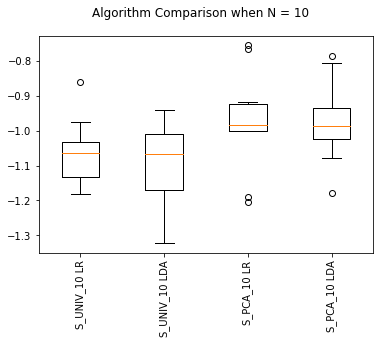

Selector: S_PCA_20 Predictive model: LDA: Mean=-0.914165 Stand Dev=(0.143574)


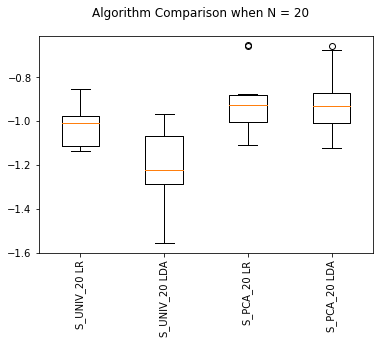

CPU times: user 24.2 s, sys: 764 ms, total: 25 s
Wall time: 11.2 s


In [72]:
%%time




import os
from multiprocessing.dummy import Pool as ThreadPool 


pool = ThreadPool() 
training_results = pool.map(eval_N, list_N[0:2])

#x = p.map_async( eval_N, list_N[0:2] )
pool.close()
pool.join()





In [73]:
#for information, if you want to compare the time

#%%time
#for n in list_N[0:2]:
#    eval_N(n)

<h2>Selection of selection and predictive models</h2>
<br> We take the three best estimators in mean. These will be tested other the 'TS1' test dataset. <br>
Really not sure about me for the criterion. Because, the variance is important too. We should think about it. 

In [74]:
def get_and_select_results_mean_var():
    list_res = [] #total list of results
    selection = [] #top ten in term of average 
                   #subject to be in the criterion in term of mean
    criterion = 0.05 #we reject if the mean is greater than 5%
    
    
    for i in range(len(training_results)):
        list_res.extend(training_results[i][1])
        
    list_res.sort(key=lambda tup: tup[1], reverse = True)
    
    count = 0
    
    while len(selection)< min(10, len(list_res)):
        if list_res[count][2] <= criterion:
            selection.append(list_res[count][0])
            count +=1
    
    return selection

selected_feat_model = get_and_select_results_mean_var()

selected_feat_model    

['S_PCA_20 LR',
 'S_PCA_20 LDA',
 'S_PCA_10 LR',
 'S_PCA_10 LDA',
 'S_UNIV_20 LR',
 'S_UNIV_10 LR',
 'S_UNIV_10 LDA',
 'S_UNIV_20 LDA']

<h1>Testing over the Testing dataset</h1> <br>
Now, we have to test the top-10 models over the remaining training set. Our aim is to see how are they are behaviouring over an un-known dataset and select the best. We will also, and it's the most import ensure there is no overfitting. 

<h2>List of selected</h2>

In [75]:
best_pipes = []

for j in range(len(selected_feat_model)):
    for n in list_N:    
        for i in range(len(build_pipes(n))):
            f = build_pipes(n)[i][0][0] + ' ' + build_pipes(n)[i][1][0]
            if f == selected_feat_model[j]:
                best_pipes.append((f, build_pipes(n)[i]))
print(len(best_pipes))         

8


<h2>Confusion Matrix</h2>

In [76]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, roc_curve


# import some data to play with

class_names = author_list




def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



In [77]:

def final_plot_confusion(Y_test, Y_pred):

    cm = confusion_matrix(Y_test, Y_pred)

    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cm, classes=class_names,
                          title='Confusion matrix, without normalization')

    # Plot normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cm, classes=class_names, normalize=True,
                          title='Normalized confusion matrix')

    plt.show()

<h2>Test over Top Pipeline</h2>

In [78]:
log_loss_list = []
for i in range(len(best_pipes)):
    name = best_pipes[i][0]
    pipeline = Pipeline([best_pipes[i][1][0], best_pipes[i][1][1]])
    pipeline.fit(X_train, Y_train)
    Y_pred = pipeline.predict(X_test)
    y_prob_output = pipeline.predict_proba(X_test) #this is what we send to kaggle.
    result = log_loss(Y_test, y_prob_output)
    log_loss_list.append((name, result, pipeline))

    
log_loss_list.sort(key=lambda tup: tup[1], reverse = False)
log_loss_list

[('S_PCA_20 LR', 0.87176917676496091, Pipeline(memory=None,
       steps=[('S_PCA_20', PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)), ('LR', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
            penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
            verbose=0, warm_start=False))])),
 ('S_PCA_20 LDA', 0.87916839447275319, Pipeline(memory=None,
       steps=[('S_PCA_20', PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)), ('LDA', LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                solver='svd', store_covariance=False, tol=0.0001))])),
 ('S_PCA_10 LR', 0.91076443843036614, Pipeline(memory=None,
       steps=[('S_PCA_10', PCA(copy=True, iterated_power='auto', n_components=10, ra

In [79]:
winner = log_loss_list[0]
print('The best combination Number, Processing, Model is ' 
      + winner[0]
     + ' with a log_loss score of '
     + str(winner[1]))

The best combination Number, Processing, Model is S_PCA_20 LR with a log_loss score of 0.871769176765


<h2>Confusion Matrix</h2>

Confusion matrix, without normalization
[[15  6  2]
 [ 4 15  5]
 [ 7 10 11]]
Normalized confusion matrix
[[ 0.65217391  0.26086957  0.08695652]
 [ 0.16666667  0.625       0.20833333]
 [ 0.25        0.35714286  0.39285714]]


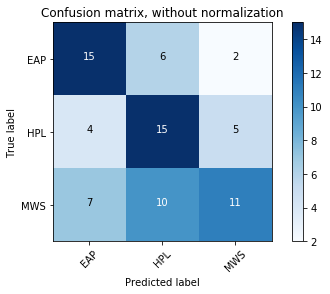

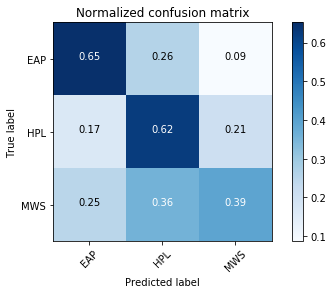

In [80]:
pipeline = winner[2]
pipeline.fit(X_train, Y_train)
Y_pred = pipeline.predict(X_test)
y_prob_output = pipeline.predict_proba(X_test)  
final_plot_confusion(Y_test, Y_pred)  

<h2>Submission to Kaggle</h2>
First, we must adapt the features building functions.

<h3>Loading Test Set</h3>

In [81]:
#loading of test dataset
test = pd.read_csv("test.csv")

test.text= test.text.astype(str)

test = test[0:30] #for coding 
#construction of the feature vectors


<h3>Adapting building functions</h3>

In [82]:
#this function works for n-grams of characters, pos tokens or words

#first argument is the n in n-gram
#analysis type is 'word', 'char', token_pos', ...

def counting_a_final(a, analysis):
    
    df_train = train.copy()
    df_test  = test.copy()
    
    #if we are counting words:
    if analysis == "word" or analysis == "char": 
        
        #check the CountVectorizer doc
        #we create a Countvectorizer, called bow_transformer
        bow_transformer = CountVectorizer(analyzer = analysis,
                                      lowercase = True, #we don't care about place in sentence
                                      ngram_range = (a, a),
                                      stop_words='english')

        #we use bow_transformer to fit and transform our training set
        messages_bow = bow_transformer.fit_transform(df_train['text'])
        
        #we use bow_transformer to transform our test set. 
        #We do not need to train if first because the fitting would recompute the idf, we don't want that
        messages_bow_test = bow_transformer.transform(df_test['text'])
    
    #if we are counting POS:    
    elif analysis == "token_pos":
        
        #this is the punctuation we want to keep
        punctuation = r"(?u)\b\w\w+\b|!|\?|\"|\'|\.|\,|\;|\:|\$|\(|\)|\--|\&|\``|\'' + PRP$ + WP$"
        #we create a Countvectorizer, called bow_transformer
        bow_transformer = CountVectorizer(analyzer = 'word',
                                          lowercase = False, #we DO care about place in sentence
                                          ngram_range = (a, a),
                                          token_pattern =  punctuation, #we DO care about punctuation
                                          stop_words='english')
        
        #we use the transform_tag function to transform the sentence in a sentence of pos tag        
        #we use bow_transformer to fit and transform our training set
        messages_bow = bow_transformer.fit_transform(df_train['text'].apply(transform_tag))
        #we use bow_transformer to transform our test set
        #We do not need to train if first because the fitting would recompute the idf, we don't want that
        messages_bow_test = bow_transformer.transform(df_test['text'].apply(transform_tag))

        
    #this is the DataFrame Concerning the regular counting of words
    
    ##What does this do?
    """
    messages_tfidf = TfidfTransformer().fit_transform(messages_bow)
    messages_tfidf_test = TfidfTransformer().transform(messages_bow_test)
    names = bow_transformer.get_feature_names()
    
    """
    tfidf_transformer = TfidfTransformer().fit(messages_bow)
    messages_tfidf = tfidf_transformer.transform(messages_bow)
    messages_tfidf_test = tfidf_transformer.transform(messages_bow_test)
    
    names = bow_transformer.get_feature_names()
     
    
    
    
    return (messages_tfidf, names, messages_tfidf_test)


In [108]:
def build_bag_a_final(a,  analysis, top_n = 50):
    df_bag = train.copy()
    df_bag_test = test.copy()
    
    build = counting_a_final(a, analysis)
    
    alpha = top_feats_by_class(build[0], df_bag.author, build[1], top_n = top_n)

    a = list(alpha[0].feature.values)
    b = list(alpha[1].feature.values)
    c = list(alpha[2].feature.values)
    bag = set(a + b + c)


    for w in bag:
        vec = build[0][:, build[1].index(w)].toarray()
        df_bag[w] = vec

        vec_test = build[2][:, build[1].index(w)].toarray()
        df_bag_test[w] = vec_test
        
    df_bag = df_bag.drop(labels = ['text','author'], axis = 1)
    df_bag_test = df_bag_test.drop(labels = ['text'], axis = 1)

        
    return df_bag, df_bag_test

In [114]:
#we build here the 2 feature datasets (one for train, one for test)
#should be adapted when we'll add features

def build_bunch_train(dataframe):
    list_df_tr = [build_meta(dataframe),
                  build_sensi(dataframe),
                  build_bag_a_final(1,'word')[0],
                  build_bag_a_final(2,'word')[0],
                  build_bag_a_final(3,'word')[0],
                  build_bag_a_final(1,'char')[0],
                  build_bag_a_final(2,'char')[0],
                  build_bag_a_final(3,'char')[0],
                  build_bag_a_final(4,'char')[0],
                  build_bag_a_final(5,'char')[0],
                  build_bag_a_final(6,'char')[0],
                  build_bag_a_final(7,'char')[0],
                  build_bag_a_final(1, 'token_pos')[0],
                  build_bag_a_final(2, 'token_pos')[0],
                  build_bag_a_final(3, 'token_pos')[0],
                  build_bag_a_final(4, 'token_pos')[0],
                  build_bag_a_final(5, 'token_pos')[0],
                  build_bag_a_final(6, 'token_pos')[0]
              ]
    bunch = pd.merge(list_df_tr[0], list_df_tr[1])
    
    for i in range(2, len(list_df_tr)):
        alpha = bunch
        bunch = pd.merge(alpha, list_df_tr[i], on = 'id')
    
    return bunch

#build_bunch_train(train)


In [115]:
def build_bunch_test(dataframe):
    list_df_ts = [build_meta(dataframe),
                  build_sensi(dataframe),
                  build_bag_a_final(1,'word')[1],
                  build_bag_a_final(2,'word')[1],
                  build_bag_a_final(3,'word')[1],
               
                  build_bag_a_final(1,'char')[1],
                  build_bag_a_final(2,'char')[1],
                  build_bag_a_final(3,'char')[1],
                  build_bag_a_final(4,'char')[1],
                  build_bag_a_final(5,'char')[1],
                  build_bag_a_final(6,'char')[1],
                  build_bag_a_final(7,'char')[1],
               
                  build_bag_a_final(1, 'token_pos')[1],
                  build_bag_a_final(2, 'token_pos')[1],
                  build_bag_a_final(3, 'token_pos')[1],
                  build_bag_a_final(4, 'token_pos')[1],
                  build_bag_a_final(5, 'token_pos')[1],
                  build_bag_a_final(6, 'token_pos')[1]
                 ]


    bunch = pd.merge(list_df_ts[0], list_df_ts[1])
    
    for i in range(2, len(list_df_ts)):
        bunch = pd.merge(bunch, list_df_ts[i], on = 'id')
    
    return bunch

#build_bunch_test(test)

<h3>Training over all the Training Dataset</h3>

In [116]:
# load dataset

names = author_list
dataframe_train = build_normalization(build_bunch_train(train))
array = dataframe_train.values
X_train = array[:,3:]
Y_train = array[:,2]

names = author_list
dataframe_test = build_normalization(build_bunch_test(test))
array = dataframe_test.values
X_test = array[:,2:]
Y_test = array[:,2]

In [117]:
#training
pipeline = winner[2]
pipeline.fit(X_train, Y_train)


Pipeline(memory=None,
     steps=[('S_PCA_20', PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('LR', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

<h3>Generating the probabilities</h3>

In [118]:
Y_pred = pipeline.predict(X_test)
y_prob_output = pipeline.predict_proba(X_test)

In [119]:
print(y_prob_output)

[[  8.37875124e-04   4.21839536e-01   5.77322588e-01]
 [  3.74572621e-06   4.99884275e-01   5.00111979e-01]
 [  3.56944537e-06   5.00048625e-01   4.99947805e-01]
 [  4.54832772e-06   4.99782032e-01   5.00213420e-01]
 [  1.17405551e-02   5.25309256e-01   4.62950189e-01]
 [  7.76703678e-05   4.99546440e-01   5.00375890e-01]
 [  5.10905789e-02   6.31723985e-01   3.17185436e-01]
 [  3.07079274e-05   4.98717546e-01   5.01251746e-01]
 [  1.31534796e-02   3.80227939e-01   6.06618581e-01]
 [  1.86978821e-01   4.50387230e-01   3.62633950e-01]
 [  9.43753751e-07   4.99938278e-01   5.00060778e-01]
 [  1.62011814e-07   4.99992299e-01   5.00007539e-01]
 [  2.34481204e-05   4.80298385e-01   5.19678167e-01]
 [  1.08981413e-04   4.99600512e-01   5.00290507e-01]
 [  2.64318835e-02   3.82444771e-01   5.91123346e-01]
 [  1.21200443e-02   1.85523801e-01   8.02356155e-01]
 [  1.52903729e-02   2.55500263e-01   7.29209364e-01]
 [  8.81063254e-03   4.02833509e-01   5.88355859e-01]
 [  3.98509125e-04   4.74212

<h3>CSV File</h3>

In [120]:
y_prob_output[:,0]

array([  8.37875124e-04,   3.74572621e-06,   3.56944537e-06,
         4.54832772e-06,   1.17405551e-02,   7.76703678e-05,
         5.10905789e-02,   3.07079274e-05,   1.31534796e-02,
         1.86978821e-01,   9.43753751e-07,   1.62011814e-07,
         2.34481204e-05,   1.08981413e-04,   2.64318835e-02,
         1.21200443e-02,   1.52903729e-02,   8.81063254e-03,
         3.98509125e-04,   4.45090230e-04,   1.56600630e-02,
         5.68598057e-05,   4.98746671e-01,   4.19685452e-01,
         1.00696820e-03,   3.02245987e-03,   1.03644214e-03,
         2.60301458e-01,   2.13047136e-06,   1.68896513e-07])

In [121]:
df_submit = pd.DataFrame(columns = ['id',"EAP","HPL","MWS"])
df_submit['id'] = test['id']
df_submit['EAP'] = y_prob_output[:,0]
df_submit['HPL'] = y_prob_output[:,1]
df_submit['MWS'] = y_prob_output[:,2]
df_submit


,id,EAP,HPL,MWS
0,id02310,8.378751e-04,0.421840,0.577323
1,id24541,3.745726e-06,0.499884,0.500112
2,id00134,3.569445e-06,0.500049,0.499948
3,id27757,4.548328e-06,0.499782,0.500213
4,id04081,1.174056e-02,0.525309,0.462950
5,id27337,7.767037e-05,0.499546,0.500376
6,id24265,5.109058e-02,0.631724,0.317185
7,id25917,3.070793e-05,0.498718,0.501252
8,id04951,1.315348e-02,0.380228,0.606619
9,id14549,1.869788e-01,0.450387,0.362634


In [122]:
df_submit.to_csv('submission.csv', index=False)

In [123]:
end_time = datetime.now()

print('Congratulation, project is done ! It took: ' + str(end_time - start_time))

Congratulation, project is done ! It took: 0:16:26.966069
